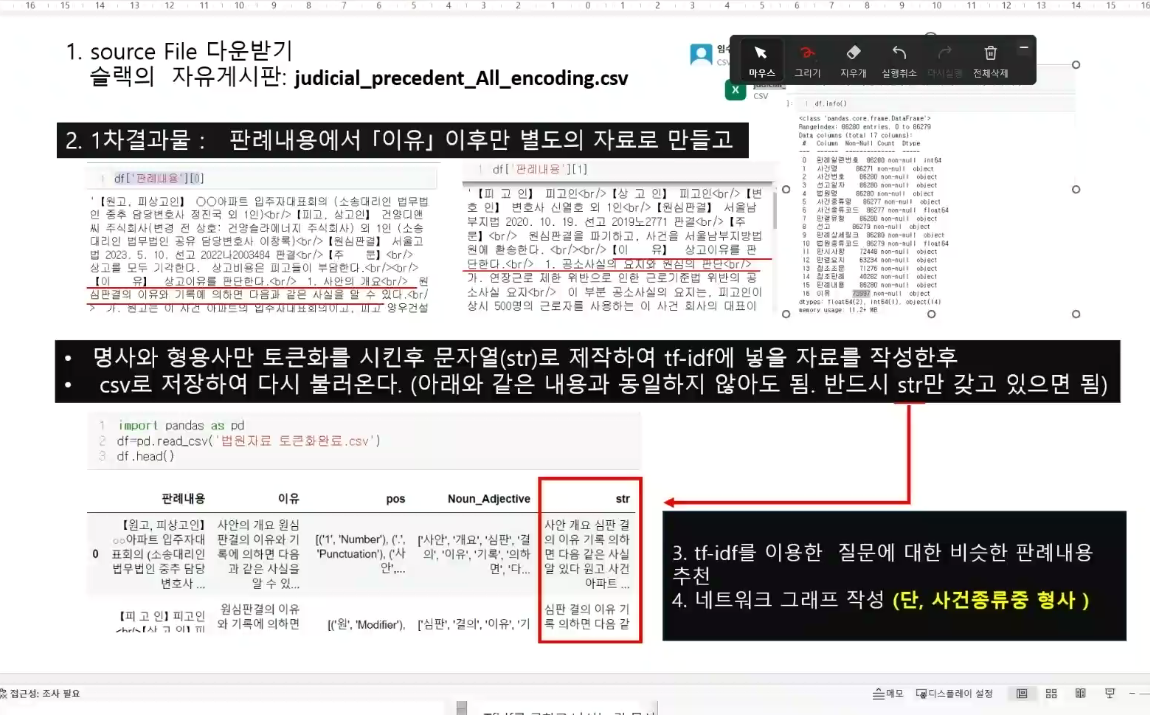

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv("./data/judicial_precedent_All_encoding.csv")[:1000]
df.head()

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,사건종류코드,판결유형,선고,판례상세링크,법원종류코드,판시사항,판결요지,참조조문,참조판례,판례내용
0,238193,손해배상(기),2023다246600,2023.12.07,대법원,민사,400101.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,집합건물의 시공자의 분양자에 대한 하자보수를 갈음하는 손해배상채무의 소멸시효가 ...,집합건물의 소유 및 관리에 관한 법률(이하 ‘집합건물법’이라 한다) 제9조 제1항은...,"집합건물의 소유 및 관리에 관한 법률 제9조 제1항, 제2항, 제3항, 민법 제66...",NaN,"【원고, 피상고인】 ○○아파트 입주자대표회의 (소송대리인 법무법인 중추 담당변호사 ..."
1,238199,근로기준법위반·근로자퇴직급여보장법위반,2020도15393,2023.12.07,대법원,형사,400102.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 구 근로기준법상 ‘1주간의 연장근로가 12시간을 초과하였는지’는 근로시간이...,[1] 구 근로기준법(2017. 11. 28. 법률 제15108호로 개정되기 전의 ...,[1] 구 근로기준법(2017. 11. 28. 법률 제15108호로 개정되기 전의...,[1] 대법원 2013. 12. 18. 선고 2012다89399 전원합의체 판결(...,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 신열...
2,238197,건물인도,2022다279795,2023.12.07,대법원,민사,400101.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 임차인의 계약갱신 요구와 이를 거절할 수 있는 사유를 정한 주택임대차보호...,[1] 2020. 7. 31. 법률 제17470호 개정으로 신설된 주택임대차보호...,[1] 주택임대차보호법 제6조의3 제1항 / [2] 주택임대차보호법 제6조의3 제...,[1] 대법원 2022. 12. 1. 선고 2021다266631 판결(공2023상...,"【원고, 피상고인】 원고<br/>【피고, 상고인】 피고 1 외 1인 (소송대리인 법..."
3,238195,저작권법위반·부정경쟁방지및영업비밀보호에관한법률위반,2020도17863,2023.12.07,대법원,형사,400102.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 저작재산권 침해 여부를 가리기 위하여 두 저작물 사이에 실질적 유사성이 있...,[1] 저작권법이 보호하는 것은 인간의 사상 또는 감정을 말·문자·음·색 등에 의...,"[1] 저작권법 제136조 제1항 제1호 / [2] 저작권법 제20조, 제136조...","[1] 대법원 2010. 2. 11. 선고 2007다63409 판결(공2010상,...",【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 민...
4,238191,소유권이전등기,2023다269139,2023.12.07,대법원,민사,400101.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 당사자 사이에 계약의 해석을 둘러싸고 이견이 있어 당사자의 의사 해석이 문...,[1] 일반적으로 계약을 해석할 때에는 형식적인 문구에만 얽매여서는 안 되고 쌍방...,"[1] 민법 제105조 / [2] 민법 제536조 / [3] 민법 제2조 제1항,...",[1] 대법원 2021. 3. 25. 선고 2018다275017 판결(공2021상...,"【원고, 상고인】 원고 (소송대리인 법무법인 지온 담당변호사 안민 외 1인)<br/..."


### **기초 통계량 확인**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   판례일련번호  1000 non-null   int64  
 1   사건명     1000 non-null   object 
 2   사건번호    1000 non-null   object 
 3   선고일자    1000 non-null   object 
 4   법원명     1000 non-null   object 
 5   사건종류명   1000 non-null   object 
 6   사건종류코드  1000 non-null   float64
 7   판결유형    1000 non-null   object 
 8   선고      1000 non-null   object 
 9   판례상세링크  1000 non-null   object 
 10  법원종류코드  1000 non-null   float64
 11  판시사항    864 non-null    object 
 12  판결요지    741 non-null    object 
 13  참조조문    864 non-null    object 
 14  참조판례    648 non-null    object 
 15  판례내용    1000 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
df.isnull().sum()

판례일련번호      0
사건명         0
사건번호        0
선고일자        0
법원명         0
사건종류명       0
사건종류코드      0
판결유형        0
선고          0
판례상세링크      0
법원종류코드      0
판시사항      136
판결요지      259
참조조문      136
참조판례      352
판례내용        0
dtype: int64

In [7]:
df.describe()

,판례일련번호,사건종류코드,법원종류코드
count,1000.00000,1000.00000,1000.000000
mean,234896.07200,400102.61800,400201.230000
std,2632.67251,2.42321,0.421043
min,227683.00000,400101.00000,400201.000000
25%,232914.50000,400101.00000,400201.000000
50%,234864.00000,400102.00000,400201.000000
75%,237221.50000,400102.00000,400201.000000
max,238363.00000,400108.00000,400202.000000


In [8]:
df.columns

Index(['판례일련번호', '사건명', '사건번호', '선고일자', '법원명', '사건종류명', '사건종류코드', '판결유형', '선고',
       '판례상세링크', '법원종류코드', '판시사항', '판결요지', '참조조문', '참조판례', '판례내용'],
      dtype='object')

In [9]:
df.nunique()

판례일련번호    1000
사건명        628
사건번호       999
선고일자       160
법원명         38
사건종류명        6
사건종류코드       6
판결유형         9
선고           2
판례상세링크    1000
법원종류코드       2
판시사항       840
판결요지       676
참조조문       830
참조판례       588
판례내용      1000
dtype: int64

In [10]:
df['사건종류명'].value_counts()

민사      493
형사      278
일반행정    144
세무       54
가사       19
특허       12
Name: 사건종류명, dtype: int64

**`Object type`데이터만 뽑아내기**

In [11]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['사건명', '사건번호', '선고일자', '법원명', '사건종류명', '판결유형', '선고', '판례상세링크', '판시사항',
       '판결요지', '참조조문', '참조판례', '판례내용'],
      dtype='object')

In [12]:
field = object_cols[3]
df[field].value_counts()

대법원            770
서울고등법원          72
서울중앙지방법원        26
대구지방법원          17
대전고등법원          10
서울북부지방법원         7
청주지방법원           6
대전지방법원           6
수원지방법원           6
부산지방법원           6
서울남부지방법원         6
의정부지방법원          6
수원고등법원           5
광주지방법원           5
대구고등법원           5
서울행정법원           5
창원지방법원           4
인천지방법원           4
서울고등법원인천재판부      4
서울고등법원춘천재판부      3
광주고등법원           3
전주지방법원           3
서울동부지방법원         3
제주지방법원           2
부산고등법원           2
울산지방법원           2
춘천지방법원원주지원       1
광주고등법원제주재판부      1
부산고등법원울산재판부      1
광주고등법원전주재판부      1
수원지방법원평택지원       1
대구지방법원포항지원       1
의정부지방법원고양지원      1
춘천지방법원           1
대구가정법원           1
창원지방법원마산지원       1
특허법원             1
광주지방법원장흥지원       1
Name: 법원명, dtype: int64

In [13]:
df['판례내용'][0]

'【원고, 피상고인】 ○○아파트 입주자대표회의 (소송대리인 법무법인 중추 담당변호사 정진국 외 1인)<br/>【피고, 상고인】 건양디앤씨 주식회사(변경 전 상호: 건양솔라에너지 주식회사) 외 1인 (소송대리인 법무법인 공유 담당변호사 이창록)<br/>【원심판결】 서울고법 2023. 5. 10. 선고 2022나2003484 판결<br/>【주    문】<br/>  상고를 모두 기각한다.  상고비용은 피고들이 부담한다.<br/><br/>【이    유】  상고이유를 판단한다.<br/>  1. 사안의 개요<br/>  원심판결의 이유와 기록에 의하면 다음과 같은 사실을 알 수 있다.<br/>  가. 원고는 이 사건 아파트의 입주자대표회의이고, 피고 양우건설 주식회사(이하 ‘피고 양우건설’이라 한다)는 이 사건 아파트를 건축한 시공자이며, 피고 건양디앤씨 주식회사(이하 ‘피고 건양디앤씨’라 한다)는 이 사건 아파트를 분양한 분양자이다.<br/>  나. 원고는 이 사건 아파트 구분소유자 일부로부터 피고들에 대한 하자보수를 갈음하는 손해배상채권을 양수하였고, 피고들에게 채권양도 통지를 하였다. <br/>  다. 이에 따라 원고는 피고들을 상대로 하자보수를 갈음하는 손해배상을 청구하는 이 사건 소를 제기하였다. 피고 양우건설은 분양자인 피고 건양디앤씨가 시공자인 피고 양우건설에게 가지는 하자보수를 갈음하는 손해배상청구권이 소멸시효 완성으로 소멸하였으므로, 「집합건물의 소유 및 관리에 관한 법률」(이하 ‘집합건물법’이라 한다) 제9조 제2항에 따라 이 부분에 대하여 원고에게 책임을 부담하지 않는다고 주장하였다. <br/>  2. 피고 양우건설의 상고이유에 대한 판단<br/>  가. 집합건물법 제9조 제1항은 "제1조 또는 제1조의2의 건물을 건축하여 분양한 자(이하 ‘분양자’라 한다)와 분양자와의 계약에 따라 건물을 건축한 자로서 대통령령으로 정하는 자(이하 ‘시공자’라 한다)는 구분소유자에 대하여 담보책임을 진다. 이 경우 그 담보책임에 관하여는 민법 제667조 및 제668조를

In [14]:
text = df['판례내용'][0]
reason_index = text.index('【이    유】')
print(text[reason_index:])

【이    유】  상고이유를 판단한다.<br/>  1. 사안의 개요<br/>  원심판결의 이유와 기록에 의하면 다음과 같은 사실을 알 수 있다.<br/>  가. 원고는 이 사건 아파트의 입주자대표회의이고, 피고 양우건설 주식회사(이하 ‘피고 양우건설’이라 한다)는 이 사건 아파트를 건축한 시공자이며, 피고 건양디앤씨 주식회사(이하 ‘피고 건양디앤씨’라 한다)는 이 사건 아파트를 분양한 분양자이다.<br/>  나. 원고는 이 사건 아파트 구분소유자 일부로부터 피고들에 대한 하자보수를 갈음하는 손해배상채권을 양수하였고, 피고들에게 채권양도 통지를 하였다. <br/>  다. 이에 따라 원고는 피고들을 상대로 하자보수를 갈음하는 손해배상을 청구하는 이 사건 소를 제기하였다. 피고 양우건설은 분양자인 피고 건양디앤씨가 시공자인 피고 양우건설에게 가지는 하자보수를 갈음하는 손해배상청구권이 소멸시효 완성으로 소멸하였으므로, 「집합건물의 소유 및 관리에 관한 법률」(이하 ‘집합건물법’이라 한다) 제9조 제2항에 따라 이 부분에 대하여 원고에게 책임을 부담하지 않는다고 주장하였다. <br/>  2. 피고 양우건설의 상고이유에 대한 판단<br/>  가. 집합건물법 제9조 제1항은 "제1조 또는 제1조의2의 건물을 건축하여 분양한 자(이하 ‘분양자’라 한다)와 분양자와의 계약에 따라 건물을 건축한 자로서 대통령령으로 정하는 자(이하 ‘시공자’라 한다)는 구분소유자에 대하여 담보책임을 진다. 이 경우 그 담보책임에 관하여는 민법 제667조 및 제668조를 준용한다."라고 규정하고 있다. 이에 따라 시공자는 구분소유자에게 하자보수를 갈음하는 손해배상채무(이하 ‘제1 채무’라 한다)를 부담한다. <br/>  나. 집합건물법 제9조 제2항은 "제1항에도 불구하고 시공자가 분양자에게 부담하는 담보책임에 관하여 다른 법률에 특별한 규정이 있으면 시공자는 그 법률에서 정하는 담보책임의 범위에서 구분소유자에게 제1항의 담보책임을 진다."라고 규정하고 있다. 이에 따라 다른 법률에 시공자의 분양

In [15]:
text = df['판례내용'][0]

print(text.split('【이    유】')[1])
# print(text.split("이유")[1])

  상고이유를 판단한다.<br/>  1. 사안의 개요<br/>  원심판결의 이유와 기록에 의하면 다음과 같은 사실을 알 수 있다.<br/>  가. 원고는 이 사건 아파트의 입주자대표회의이고, 피고 양우건설 주식회사(이하 ‘피고 양우건설’이라 한다)는 이 사건 아파트를 건축한 시공자이며, 피고 건양디앤씨 주식회사(이하 ‘피고 건양디앤씨’라 한다)는 이 사건 아파트를 분양한 분양자이다.<br/>  나. 원고는 이 사건 아파트 구분소유자 일부로부터 피고들에 대한 하자보수를 갈음하는 손해배상채권을 양수하였고, 피고들에게 채권양도 통지를 하였다. <br/>  다. 이에 따라 원고는 피고들을 상대로 하자보수를 갈음하는 손해배상을 청구하는 이 사건 소를 제기하였다. 피고 양우건설은 분양자인 피고 건양디앤씨가 시공자인 피고 양우건설에게 가지는 하자보수를 갈음하는 손해배상청구권이 소멸시효 완성으로 소멸하였으므로, 「집합건물의 소유 및 관리에 관한 법률」(이하 ‘집합건물법’이라 한다) 제9조 제2항에 따라 이 부분에 대하여 원고에게 책임을 부담하지 않는다고 주장하였다. <br/>  2. 피고 양우건설의 상고이유에 대한 판단<br/>  가. 집합건물법 제9조 제1항은 "제1조 또는 제1조의2의 건물을 건축하여 분양한 자(이하 ‘분양자’라 한다)와 분양자와의 계약에 따라 건물을 건축한 자로서 대통령령으로 정하는 자(이하 ‘시공자’라 한다)는 구분소유자에 대하여 담보책임을 진다. 이 경우 그 담보책임에 관하여는 민법 제667조 및 제668조를 준용한다."라고 규정하고 있다. 이에 따라 시공자는 구분소유자에게 하자보수를 갈음하는 손해배상채무(이하 ‘제1 채무’라 한다)를 부담한다. <br/>  나. 집합건물법 제9조 제2항은 "제1항에도 불구하고 시공자가 분양자에게 부담하는 담보책임에 관하여 다른 법률에 특별한 규정이 있으면 시공자는 그 법률에서 정하는 담보책임의 범위에서 구분소유자에게 제1항의 담보책임을 진다."라고 규정하고 있다. 이에 따라 다른 법률에 시공자의 분양자에 대한 담보

**`[이유]` 이후 구절들만 추출해서 df화 하기**

In [16]:
tmpList = []

for x in df['판례내용']:
    try:
        tmpList.append(x.split("【이    유】")[1].replace("<br/>", ""))
    except:
        tmpList.append("Nan")

In [17]:
df['이유'] = tmpList

In [18]:
# df.drop(["이유", "이유2"], axis = 1, inplace = True)

In [19]:
df.head()

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,사건종류코드,판결유형,선고,판례상세링크,법원종류코드,판시사항,판결요지,참조조문,참조판례,판례내용,이유
0,238193,손해배상(기),2023다246600,2023.12.07,대법원,민사,400101.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,집합건물의 시공자의 분양자에 대한 하자보수를 갈음하는 손해배상채무의 소멸시효가 ...,집합건물의 소유 및 관리에 관한 법률(이하 ‘집합건물법’이라 한다) 제9조 제1항은...,"집합건물의 소유 및 관리에 관한 법률 제9조 제1항, 제2항, 제3항, 민법 제66...",NaN,"【원고, 피상고인】 ○○아파트 입주자대표회의 (소송대리인 법무법인 중추 담당변호사 ...",상고이유를 판단한다. 1. 사안의 개요 원심판결의 이유와 기록에 의하면 다음...
1,238199,근로기준법위반·근로자퇴직급여보장법위반,2020도15393,2023.12.07,대법원,형사,400102.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 구 근로기준법상 ‘1주간의 연장근로가 12시간을 초과하였는지’는 근로시간이...,[1] 구 근로기준법(2017. 11. 28. 법률 제15108호로 개정되기 전의 ...,[1] 구 근로기준법(2017. 11. 28. 법률 제15108호로 개정되기 전의...,[1] 대법원 2013. 12. 18. 선고 2012다89399 전원합의체 판결(...,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 신열...,상고이유를 판단한다. 1. 공소사실의 요지와 원심의 판단 가. 연장근로 제한...
2,238197,건물인도,2022다279795,2023.12.07,대법원,민사,400101.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 임차인의 계약갱신 요구와 이를 거절할 수 있는 사유를 정한 주택임대차보호...,[1] 2020. 7. 31. 법률 제17470호 개정으로 신설된 주택임대차보호...,[1] 주택임대차보호법 제6조의3 제1항 / [2] 주택임대차보호법 제6조의3 제...,[1] 대법원 2022. 12. 1. 선고 2021다266631 판결(공2023상...,"【원고, 피상고인】 원고<br/>【피고, 상고인】 피고 1 외 1인 (소송대리인 법...",상고이유를 판단한다. 1. 사안의 개요 및 원심의 판단 가. 원심판결의 이...
3,238195,저작권법위반·부정경쟁방지및영업비밀보호에관한법률위반,2020도17863,2023.12.07,대법원,형사,400102.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 저작재산권 침해 여부를 가리기 위하여 두 저작물 사이에 실질적 유사성이 있...,[1] 저작권법이 보호하는 것은 인간의 사상 또는 감정을 말·문자·음·색 등에 의...,"[1] 저작권법 제136조 제1항 제1호 / [2] 저작권법 제20조, 제136조...","[1] 대법원 2010. 2. 11. 선고 2007다63409 판결(공2010상,...",【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 민...,상고이유를 판단한다. 1. 제1 상고이유에 관하여 가. 저작권법이 보호하는 ...
4,238191,소유권이전등기,2023다269139,2023.12.07,대법원,민사,400101.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 당사자 사이에 계약의 해석을 둘러싸고 이견이 있어 당사자의 의사 해석이 문...,[1] 일반적으로 계약을 해석할 때에는 형식적인 문구에만 얽매여서는 안 되고 쌍방...,"[1] 민법 제105조 / [2] 민법 제536조 / [3] 민법 제2조 제1항,...",[1] 대법원 2021. 3. 25. 선고 2018다275017 판결(공2021상...,"【원고, 상고인】 원고 (소송대리인 법무법인 지온 담당변호사 안민 외 1인)<br/...",상고이유를 판단한다. 1. 원심의 판단 원심은 이 사건 매매계약의 해석상 ...


**명사 기반 토큰화**

In [20]:
from konlpy.tag import Hannanum
from nltk.tokenize import word_tokenize

def extract_nouns(text):
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    nouns = [word for word, pos in tagged_tokens if pos.startswith('NN')]
    return nouns

`apply` 함수는 각 행 또는 열에 대해 주어진 함수를 적용하므로 데이터 처리를 병렬로 수행할 수 있음. 한 번의 함수 호출로 여러 행에 대해 작업하기 때문에 반복문을 사용하는 것보다 효율적

In [21]:
df['noun'] = df['이유'].apply(extract_nouns)
df.head()

KeyboardInterrupt: 

In [ ]:
df['str'] = [" ".join(tokens) for tokens in df['noun']]

In [ ]:
df.head()

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,사건종류코드,판결유형,선고,판례상세링크,법원종류코드,판시사항,판결요지,참조조문,참조판례,판례내용,이유,noun,str
0,238193,손해배상(기),2023다246600,2023.12.07,대법원,민사,400101.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,집합건물의 시공자의 분양자에 대한 하자보수를 갈음하는 손해배상채무의 소멸시효가 ...,집합건물의 소유 및 관리에 관한 법률(이하 ‘집합건물법’이라 한다) 제9조 제1항은...,"집합건물의 소유 및 관리에 관한 법률 제9조 제1항, 제2항, 제3항, 민법 제66...",NaN,"【원고, 피상고인】 ○○아파트 입주자대표회의 (소송대리인 법무법인 중추 담당변호사 ...",상고이유를 판단한다. 1. 사안의 개요 원심판결의 이유와 기록에 의하면 다음...,"[판단한다, 원심판결의, 이유와, 기록에, 의하면, 다음과, 같은, 사실을, 알, ...",판단한다 원심판결의 이유와 기록에 의하면 다음과 같은 사실을 알 수 있다 가 사건 ...
1,238199,근로기준법위반·근로자퇴직급여보장법위반,2020도15393,2023.12.07,대법원,형사,400102.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 구 근로기준법상 ‘1주간의 연장근로가 12시간을 초과하였는지’는 근로시간이...,[1] 구 근로기준법(2017. 11. 28. 법률 제15108호로 개정되기 전의 ...,[1] 구 근로기준법(2017. 11. 28. 법률 제15108호로 개정되기 전의...,[1] 대법원 2013. 12. 18. 선고 2012다89399 전원합의체 판결(...,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 신열...,상고이유를 판단한다. 1. 공소사실의 요지와 원심의 판단 가. 연장근로 제한...,"[판단한다, 원심의, 판단, 가, 위반으로, 인한, 근로기준법, 위반의, 공소사실,...",판단한다 원심의 판단 가 위반으로 인한 근로기준법 위반의 공소사실 요지 이 부분 공...
2,238197,건물인도,2022다279795,2023.12.07,대법원,민사,400101.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 임차인의 계약갱신 요구와 이를 거절할 수 있는 사유를 정한 주택임대차보호...,[1] 2020. 7. 31. 법률 제17470호 개정으로 신설된 주택임대차보호...,[1] 주택임대차보호법 제6조의3 제1항 / [2] 주택임대차보호법 제6조의3 제...,[1] 대법원 2022. 12. 1. 선고 2021다266631 판결(공2023상...,"【원고, 피상고인】 원고<br/>【피고, 상고인】 피고 1 외 1인 (소송대리인 법...",상고이유를 판단한다. 1. 사안의 개요 및 원심의 판단 가. 원심판결의 이...,"[판단한다, 및, 원심의, 판단, 가, 기록을, 살펴보면, 아래와, 같은, 사실을,...",판단한다 및 원심의 판단 가 기록을 살펴보면 아래와 같은 사실을 알 수 있다 원고는...
3,238195,저작권법위반·부정경쟁방지및영업비밀보호에관한법률위반,2020도17863,2023.12.07,대법원,형사,400102.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 저작재산권 침해 여부를 가리기 위하여 두 저작물 사이에 실질적 유사성이 있...,[1] 저작권법이 보호하는 것은 인간의 사상 또는 감정을 말·문자·음·색 등에 의...,"[1] 저작권법 제136조 제1항 제1호 / [2] 저작권법 제20조, 제136조...","[1] 대법원 2010. 2. 11. 선고 2007다63409 판결(공2010상,...",【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 민...,상고이유를 판단한다. 1. 제1 상고이유에 관하여 가. 저작권법이 보호하는 ...,"[판단한다, 관하여, 가, 것은, 인간의, 사상, 또는, 감정을, 말·문자·음·색,...",판단한다 관하여 가 것은 인간의 사상 또는 감정을 말·문자·음·색 등에 의하여 구체...
4,238191,소유권이전등기,2023다269139,2023.12.07,대법원,민사,400101.0,판결,선고,/DRF/lawService.do?OC=dbs313&target=prec&ID=23...,400201.0,[1] 당사자 사이에 계약의 해석을 둘러싸고 이견이 있어 당사자의 의사 해석이 문...,[1] 일반적으로 계약을 해석할 때에는 형식적인 문구에만 얽매여서는 안 되고 쌍방...,"[1] 민법 제105조 / [2] 민법 제536조 / [3] 민법 제2조 제1항,...",[1] 대법원 2021. 3. 25. 선고 2018다275017 판결(공2021상...,"【원고, 상고인】 원고 (소송대리인 법무법인 지온 담당변호사 안민 외 1인)<br/...",상고이유를 판단한다. 1. 원심의 판단 원심은 이 사건 매매계약의 해석상 ...,"[판단한다, 원심은, 이, 사건, 매매계약의, 해석상, 피고가, 사건, 아파트를, ...",판단한다 원심은 이 사건 매매계약의 해석상 피고가 사건 아파트를 원고에게 현실인도할...


In [ ]:
df_str = pd.DataFrame(df[['str', '판례내용', '이유', '사건종류명']])
df_str.to_csv("noun_tokens.csv", index = False)

**TF-IDF 이용한 비슷한 판례내용 추천**

In [3]:
df_quest = pd.read_csv("./data/noun_tokens.csv")
df_quest.head()

,str,판례내용,이유,사건종류명
0,판단한다 원심판결의 이유와 기록에 의하면 다음과 같은 사실을 알 수 있다 가 사건 ...,"【원고, 피상고인】 ○○아파트 입주자대표회의 (소송대리인 법무법인 중추 담당변호사 ...",상고이유를 판단한다. 1. 사안의 개요 원심판결의 이유와 기록에 의하면 다음...,민사
1,판단한다 원심의 판단 가 위반으로 인한 근로기준법 위반의 공소사실 요지 이 부분 공...,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 신열...,상고이유를 판단한다. 1. 공소사실의 요지와 원심의 판단 가. 연장근로 제한...,형사
2,판단한다 및 원심의 판단 가 기록을 살펴보면 아래와 같은 사실을 알 수 있다 원고는...,"【원고, 피상고인】 원고<br/>【피고, 상고인】 피고 1 외 1인 (소송대리인 법...",상고이유를 판단한다. 1. 사안의 개요 및 원심의 판단 가. 원심판결의 이...,민사
3,판단한다 관하여 가 것은 인간의 사상 또는 감정을 말·문자·음·색 등에 의하여 구체...,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 민...,상고이유를 판단한다. 1. 제1 상고이유에 관하여 가. 저작권법이 보호하는 ...,형사
4,판단한다 원심은 이 사건 매매계약의 해석상 피고가 사건 아파트를 원고에게 현실인도할...,"【원고, 상고인】 원고 (소송대리인 법무법인 지온 담당변호사 안민 외 1인)<br/...",상고이유를 판단한다. 1. 원심의 판단 원심은 이 사건 매매계약의 해석상 ...,민사


In [4]:
df_quest.rename(columns = {"str": "question"}, inplace = True)

In [5]:
df_quest.head()

,question,판례내용,이유,사건종류명
0,판단한다 원심판결의 이유와 기록에 의하면 다음과 같은 사실을 알 수 있다 가 사건 ...,"【원고, 피상고인】 ○○아파트 입주자대표회의 (소송대리인 법무법인 중추 담당변호사 ...",상고이유를 판단한다. 1. 사안의 개요 원심판결의 이유와 기록에 의하면 다음...,민사
1,판단한다 원심의 판단 가 위반으로 인한 근로기준법 위반의 공소사실 요지 이 부분 공...,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 신열...,상고이유를 판단한다. 1. 공소사실의 요지와 원심의 판단 가. 연장근로 제한...,형사
2,판단한다 및 원심의 판단 가 기록을 살펴보면 아래와 같은 사실을 알 수 있다 원고는...,"【원고, 피상고인】 원고<br/>【피고, 상고인】 피고 1 외 1인 (소송대리인 법...",상고이유를 판단한다. 1. 사안의 개요 및 원심의 판단 가. 원심판결의 이...,민사
3,판단한다 관하여 가 것은 인간의 사상 또는 감정을 말·문자·음·색 등에 의하여 구체...,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 민...,상고이유를 판단한다. 1. 제1 상고이유에 관하여 가. 저작권법이 보호하는 ...,형사
4,판단한다 원심은 이 사건 매매계약의 해석상 피고가 사건 아파트를 원고에게 현실인도할...,"【원고, 상고인】 원고 (소송대리인 법무법인 지온 담당변호사 안민 외 1인)<br/...",상고이유를 판단한다. 1. 원심의 판단 원심은 이 사건 매매계약의 해석상 ...,민사


In [ ]:
df.columns

Index(['판례일련번호', '사건명', '사건번호', '선고일자', '법원명', '사건종류명', '사건종류코드', '판결유형', '선고',
       '판례상세링크', '법원종류코드', '판시사항', '판결요지', '참조조문', '참조판례', '판례내용', '이유',
       'noun', 'str'],
      dtype='object')

In [6]:
tmpList2 = []
for x in df['판례내용']:        
    tmpList2.append(x.split("【주    문】")[0].replace("<br/>", ""))

In [ ]:
tmpList2

['【원고, 피상고인】 ○○아파트 입주자대표회의 (소송대리인 법무법인 중추 담당변호사 정진국 외 1인)【피고, 상고인】 건양디앤씨 주식회사(변경 전 상호: 건양솔라에너지 주식회사) 외 1인 (소송대리인 법무법인 공유 담당변호사 이창록)【원심판결】 서울고법 2023. 5. 10. 선고 2022나2003484 판결',
 '【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 변호사 신열호 외 1인【원심판결】 서울남부지법 2020. 10. 19. 선고 2019노2771 판결',
 '【원고, 피상고인】 원고【피고, 상고인】 피고 1 외 1인 (소송대리인 법무법인(유한) 한별 담당변호사 정인숙)【원심판결】 서울중앙지법 2022. 9. 6. 선고 2021나77014 판결',
 '【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인 민후 담당변호사 김경환 외 3인【원심판결】 서울중앙지법 2020. 11. 27. 선고 2019노3248 판결',
 '【원고, 상고인】 원고 (소송대리인 법무법인 지온 담당변호사 안민 외 1인)【피고, 피상고인】 피고 (소송대리인 변호사 박홍서)【원심판결】 인천지법 2023. 7. 14. 선고 2022나53870 판결',
 '【원고, 피상고인】 에스케이하이닉스 주식회사 (소송대리인 법무법인(유한) 태평양 담당변호사 송우철 외 5인)【피고, 상고인】 이천시장 외 1인 (소송대리인 법무법인(유한) 바른 외 1인)【피고소송참가인, 상고인】 행정안전부장관【원심판결】 수원고법 2020. 6. 10. 선고 2019누13158 판결',
 '【원고, 피상고인】 원고 1 외 1인 (소송대리인 법무법인 지향 담당변호사 이상희 외 3인)【피고, 상고인】 피고 (소송대리인 법무법인 로얄 담당변호사 박병철 외 1인)【원심판결】 의정부지법 2022. 9. 22. 선고 2021나211038 판결',
 '【원고, 상고인】 원고 (소송대리인 변호사 유성권 외 2인)【피고, 피상고인】 피고 1 외 1인 (소송대리인 변호사 조하늘)【원심판결】 대전지법 2023. 7. 5

In [7]:
df_quest['판례내용'] = tmpList2

In [16]:
df_quest_criminal = df_quest[df_quest['사건종류명'] == '형사'].reset_index(drop=True)

In [38]:
df_quest_criminal.head()

,question,판례내용,이유,사건종류명
0,판단한다 원심의 판단 가 위반으로 인한 근로기준법 위반의 공소사실 요지 이 부분 공...,【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 변호사 신열호 외 1인【원심판...,상고이유를 판단한다. 1. 공소사실의 요지와 원심의 판단 가. 연장근로 제한...,형사
1,판단한다 관하여 가 것은 인간의 사상 또는 감정을 말·문자·음·색 등에 의하여 구체...,【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인 민후 담당변호사 김경...,상고이유를 판단한다. 1. 제1 상고이유에 관하여 가. 저작권법이 보호하는 ...,형사
2,판단한다 제2항 제1호는 저작인격권 또는 실연자의 인격권을 침해하여 저작자 또는 실...,【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인 린 담당변호사 김용갑...,상고이유를 판단한다. 1. 저작권법 제136조 제2항 제1호는 저작인격권 또...,형사
3,판단한다 심리미진 여부 이 부분 상고이유는 형사소송법 제383조 제4호에서 정한 형...,【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 변호사 박남현【원심판결】 청주...,상고이유를 판단한다. 1. 사실오인 및 심리미진 여부 이 부분 상고이유는 형...,형사
4,판단한다 제1항 제5호 이하 ‘ 이 사건 조항 ’ 이라 한다 예비후보자에게 허용되는...,【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인 하늘 담당변호사 이덕...,상고이유를 판단한다. 1. 공직선거법 제60조의3 제1항 제5호(이하 ‘이 사...,형사


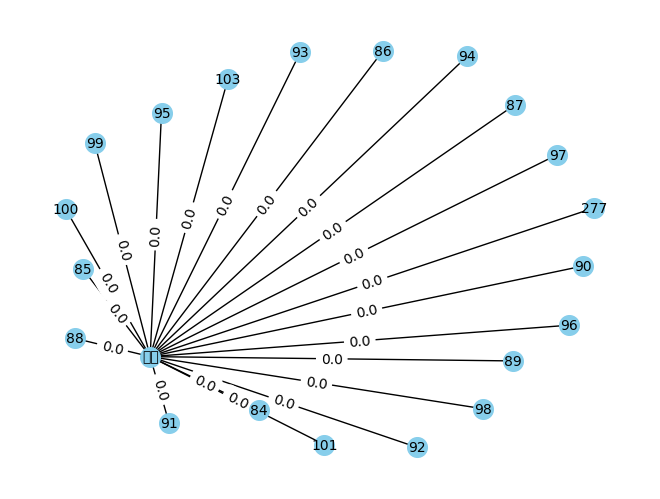

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import scipy.sparse as sp
import networkx as nx
import matplotlib.pyplot as plt

# plt.rcParams("font"family" = "malgun gothic")

def query_recommend(input_query, df_quest_criminal):
    # TF-IDF 벡터화를 위한 텍스트 데이터 준비
    corpus = df_quest_criminal['question']

    # TF-IDF 벡터화
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

    # 입력 텍스트를 TF-IDF 벡터로 변환
    input_vector = tfidf_vectorizer.transform([input_query])

    # TF-IDF 유사도 계산
    similarities = cosine_similarity(input_vector, tfidf_matrix)

    # 유사도가 가장 높은 판례내용 추출
    top_indices = np.argsort(similarities.ravel())[-20:][::-1]
    
    recommended_panjeneung_list = []

    for idx in top_indices:
        panjeneung = df_quest_criminal.loc[idx, ['판례내용']]
        recommended_panjeneung_list.append(panjeneung)

    tfidf_matrix = tfidf_matrix.astype(float)
    tfidf_matrix = sp.csr_matrix(tfidf_matrix)

    # 그래프 생성
    G = nx.Graph()

    # input vector와 tfidf_vector 간의 유사도 추가
    for panjeneung, idx in zip(recommended_panjeneung_list, top_indices):
        G.add_edge(idx, df_quest_criminal.loc[idx, '사건종류명'], weight=similarities[0][idx])


    # 그래프 그리기
    pos = nx.spring_layout(G)  # 그래프 레이아웃 설정
    nx.draw(G, pos, with_labels=True, node_size=200, node_color="skyblue", font_size=10)  # 그래프 그리기
    labels = nx.get_edge_attributes(G, 'weight')  # 간선 weight 가져오기
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # 간선 weight 표시
    plt.show()

    return recommended_panjeneung_list

# 사용 예시
input_query = "소유권이전등기"
recommended_panjeneung_list = query_recommend(input_query, df_quest_criminal)
